In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F # convolution function, pooling function, activation function, dropout function, loss function 등의 기능 제공
import torch.optim as optim #optimizer 제공
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [33]:
x_data = torch.FloatTensor( [[ 7.71011738e-01, -3.13508197e-01,  5.42352572e-01],
 [-1.85861239e+00,  2.16116006e-01,  5.08396243e-01],
 [ 5.39058321e-01, -1.11792545e+00,  4.15393930e-02],
 [-6.37655012e-01, -2.36184031e-01, -3.38821966e-01],
 [-8.78107893e-01,  9.02525097e-03, -7.47870949e-01],
 [-9.88779049e-01,  2.56570452e-01, -1.56434170e-01],
 [-1.53495196e-01, -1.42121723e+00, -1.18761229e+00],
 [-6.34679305e-01,  1.27837923e+00,  4.33496330e-01],
 [-7.44707629e-02, -3.75669423e-01, -3.81092518e-01],
 [ 9.76147160e-06, -8.44213704e-01,  5.01857207e-01],
 [ 2.29220801e+00,  5.51454045e-01, -9.09007615e-01],
 [-8.41747366e-01, -1.79343559e+00,  1.64027081e+00],
 [ 4.79705919e-02,  6.11340780e-01, -3.35677339e-01],
 [ 1.17500122e+00, -1.91304965e-02, -5.96159700e-01],
 [-1.05795222e+00, -1.24528809e+00,  5.02881417e-01],
 [-2.43476758e+00,  2.23136679e+00, -2.69056960e-01],
 [ 1.35963386e+00,  3.70444537e-01,  1.12726505e-01],
 [ 1.00036589e+00,  8.77102184e-02, -8.29135289e-01],
 [-2.13619610e+00, -5.62668272e-02, -4.16757847e-01],
 [ 1.46767801e+00,  1.73118467e+00, -1.86809065e+00]])

y_data = torch.FloatTensor([[  96.68704955],
 [-158.98008532],
 [  54.49974683],
 [ -71.2832092 ],
 [-109.68370597],
 [ -96.20277494],
 [ -61.52618908],
 [ -38.24501686],
 [ -19.32846993],
 [  16.24620599],
 [ 198.60935931],
 [ -31.37236913],
 [  -0.41438801],
 [  97.7887465 ],
 [ -88.92656277],
 [-234.84110943],
 [ 140.94339104],
 [  72.84533909],
 [-220.9413211 ],
 [  90.02679734]])

# 다중 선형 회귀 클래스
class MultiLinearRegression(nn.Module):
    def __init__(self):
        super(MultiLinearRegression, self).__init__()
        self.linear = nn.Linear(3, 1) # 입력 3개, 출력 1개

    def forward(self, x):
        return self.linear(x)


model = MultiLinearRegression()

# 손실 함수와 옵티마이저
loss_fn = nn.MSELoss()  # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=1e-3) # 뒤에 숫자를 바꿔본다


# 학습
epochs = 10000
for epoch in range(epochs + 1):
    prediction = model(x_data)
    
    loss = loss_fn(prediction, y_data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 ==0:
      print('Epoch {:4d}/{} prediction: {} Cost: {:.6f}'.format(
          epoch, epochs, prediction.squeeze().detach(), loss.item()
      ))

print(model.linear.weight)
print(model.linear.bias)
print(model(torch.tensor([[1.0, 2.0, 3.0]])))


Epoch    0/10000 prediction: tensor([-0.4108,  0.1295, -0.0259, -0.0047, -0.0088, -0.0970,  0.3371, -0.6003,
        -0.1085,  0.0020, -1.0861,  0.5335, -0.5087, -0.5786,  0.4452, -0.4163,
        -0.8071, -0.5583,  0.3509, -1.2459]) Cost: 13311.845703
Epoch 1000/10000 prediction: tensor([  67.6916, -163.5652,   46.7167,  -62.9096,  -88.5408,  -94.0338,
         -23.0083,  -62.6318,  -13.7032,    2.7087,  183.1521,  -56.0886,
          -7.1066,   91.3885,  -87.4333, -229.6191,  111.9643,   73.6625,
        -194.6655,   97.6652]) Cost: 314.585907
Epoch 2000/10000 prediction: tensor([  82.3737, -165.5352,   51.4019,  -68.0312,  -99.4013,  -97.8619,
         -38.5609,  -53.9062,  -15.9269,   10.0374,  193.5971,  -43.8795,
          -4.9252,   96.2004,  -88.5172, -238.5456,  127.6475,   74.8487,
        -210.3470,   94.7403]) Cost: 86.642723
Epoch 3000/10000 prediction: tensor([  88.8850, -163.1865,   52.0503,  -69.8997, -103.7614,  -97.9501,
         -48.1061,  -46.7261,  -17.2948,   13.3

----
# 로지스틱스 회귀

500
500
1000


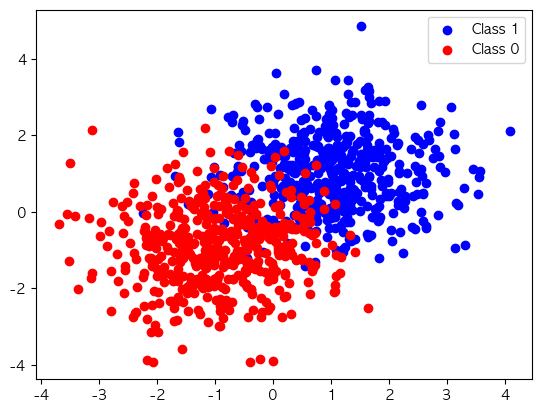

In [34]:
# Training data
np.random.seed(42)
num_samples = 1000
mean_1 = np.array([1.0, 1.0]) # 평균값 1,1
cov_1 = np.array([[1, 0], [0, 1]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples // 2)
mean_2 = np.array([-1.0, -1.0])
cov_2 = np.array([[1, 0], [0, 1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples // 2)
data = np.vstack((data_1, data_2)) # 세로로 행렬 결합 가로는 h
labels = np.ones(num_samples)
labels[num_samples // 2:] = 0

print(len(data_1))
print(len(data_2))
print(len(data))
# Plot
plt.scatter(data_1[:, 0], data_1[:, 1], color='b', label='Class 1')
plt.scatter(data_2[:, 0], data_2[:, 1], color='r', label='Class 0')
plt.legend()
plt.show()


data_1.shape (500, 2)
data_2.shape (500, 2)
data.shape torch.Size([1000, 2])
Epoch [1/1000], Loss: 0.4835
Epoch [101/1000], Loss: 0.3703
Epoch [201/1000], Loss: 0.3166
Epoch [301/1000], Loss: 0.2858
Epoch [401/1000], Loss: 0.2660
Epoch [501/1000], Loss: 0.2521
Epoch [601/1000], Loss: 0.2420
Epoch [701/1000], Loss: 0.2342
Epoch [801/1000], Loss: 0.2282
Epoch [901/1000], Loss: 0.2233


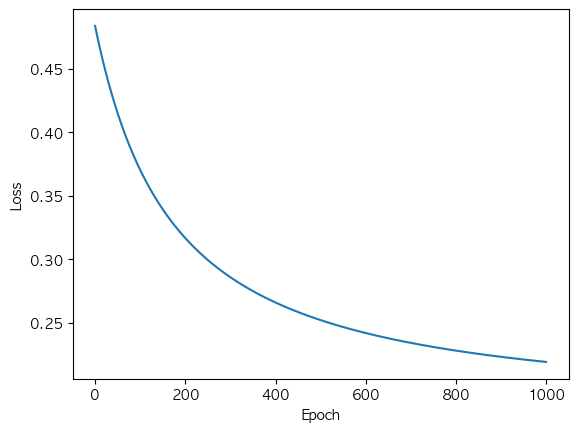

w [[1.3993902 1.1360247]]
b [0.05269558]


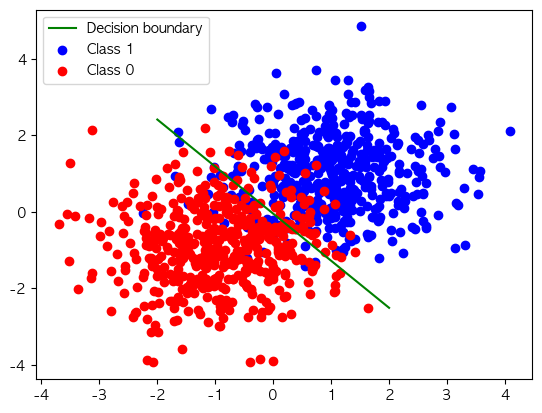

In [35]:
# Convert data and labels to PyTorch Variables
data = torch.from_numpy(data).float()
labels = torch.from_numpy(labels).float()
labels = labels.view(-1, 1) # 앞은 상관 없고 뒤에는 1로 만들겠다. reshape와 같은 함수
num_samples, num_features = data.shape

print("data_1.shape",data_1.shape)
print("data_2.shape",data_2.shape)
print("data.shape",data.shape)

# Define logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out

# Initialize model, loss function, and optimizer
learning_rate = 0.01
num_epochs = 1000
input_dim = num_features
output_dim = 1
model = LogisticRegression(input_dim, output_dim)
criterion = nn.BCELoss() #Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train model
loss_history = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.data.numpy())

    if epoch % 100 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, loss.data))

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot decision boundary
w = model.linear.weight.data.numpy()
print("w", w)
b = model.linear.bias.data.numpy()
print("b", b)
x_plot = np.array([-2, 2])
y_plot = (-b - w[0][0]*x_plot) / w[0][1]    #  0 = w1 x1 + w2 x2 + b
plt.plot(x_plot, y_plot, color='g', label='Decision boundary')
plt.scatter(data_1[:, 0], data_1[:, 1], color='b', label='Class 1')
plt.scatter(data_2[:, 0], data_2[:, 1], color='r', label='Class 0')
plt.legend()
plt.show()

In [36]:
# class1일 확률 0.05% => class0
model(torch.Tensor([-3, -3]))

tensor([0.0005], grad_fn=<SigmoidBackward0>)

In [40]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

print("X", X)
print("y", y)

X [[-1.45911997  1.27418673]
 [-1.40811432  0.7656503 ]
 [-0.80951052 -1.65609373]
 [-2.12064621 -0.66898039]
 [-1.47889457  0.75970564]
 [ 0.21492267 -0.94078319]
 [-0.88723533  1.27909021]
 [-1.69760226  0.2121016 ]
 [-0.95780633 -1.46767931]
 [-2.10161186 -0.05177387]
 [-0.57325084 -1.35015894]
 [ 0.321193   -0.02985844]
 [-2.5735914  -0.87730766]
 [-1.14876618  0.61554048]
 [-1.38262269  0.65768775]
 [-0.09595018 -0.40346164]
 [-0.76692811  1.06812167]
 [-2.10942592 -0.23163573]
 [ 0.55893733 -2.0168051 ]
 [-1.42934539 -1.8439296 ]
 [-1.84899277  0.29284397]
 [-1.00962409  1.14260845]
 [-1.80151453 -1.76488978]
 [ 0.41228357  2.37044324]
 [-1.96672657 -0.45787397]
 [-1.92263976 -0.07816785]
 [-0.68467409  1.31431729]
 [-1.72232541  0.34032824]
 [-1.61710431  0.55440197]
 [-0.50158669  1.46554165]
 [-1.13494826 -1.10274489]
 [ 0.04382985  1.99953558]
 [-0.91949553 -1.23405738]
 [-1.58958085 -0.66467512]
 [-1.15834408  0.86326863]
 [ 0.19071829  2.2581361 ]
 [ 0.85374174  0.45121711]

data.shape torch.Size([100, 2])
Epoch [1/1000], Loss: 0.5226
Epoch [101/1000], Loss: 0.4385
Epoch [201/1000], Loss: 0.3996
Epoch [301/1000], Loss: 0.3775
Epoch [401/1000], Loss: 0.3631
Epoch [501/1000], Loss: 0.3529
Epoch [601/1000], Loss: 0.3453
Epoch [701/1000], Loss: 0.3394
Epoch [801/1000], Loss: 0.3347
Epoch [901/1000], Loss: 0.3309


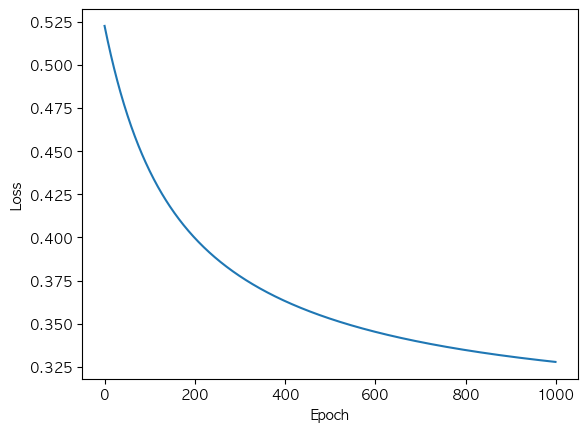

w [[0.29496372 1.6263479 ]]
b [0.19377704]


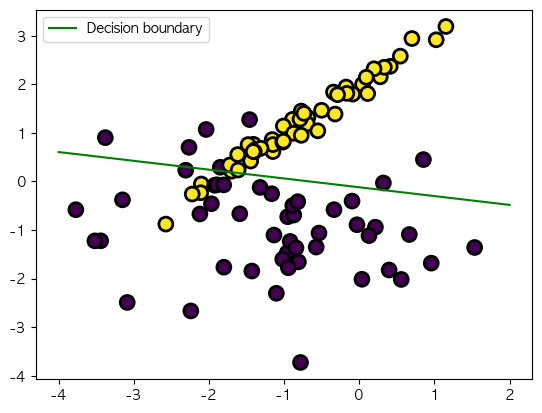

In [56]:


# Convert data and labels to PyTorch Variables
data = torch.from_numpy(X).float() # 데이터 X를 텐서로 변환
labels = torch.from_numpy(y).float() # 라벨 y를 텐서로 변환
labels = labels.view(-1, 1) # 앞은 상관 없고 뒤에는 1로 만들겠다. reshape와 같은 함수
num_samples, num_features = data.shape

print("data.shape",data.shape)

# Define logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out

# Initialize model, loss function, and optimizer
learning_rate = 0.01
num_epochs = 1000
input_dim = num_features
output_dim = 1
model = LogisticRegression(input_dim, output_dim)
criterion = nn.BCELoss() #Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train model
loss_history = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.data.numpy())

    if epoch % 100 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, loss.data))

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot decision boundary
w = model.linear.weight.data.numpy()
print("w", w)
b = model.linear.bias.data.numpy()
print("b", b)
x_plot = np.array([-4, 2])
y_plot = (-b - w[0][0]*x_plot) / w[0][1]    #  0 = w1 x1 + w2 x2 + b
plt.plot(x_plot, y_plot, color='g', label='Decision boundary')
plt.scatter(data[:, 0], data[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.legend()
plt.show()

In [53]:
print("[1, 1]의 확률 :", float(model(torch.Tensor([1, 1]))) * 100, "%") # [1, 1]이 Class1에 속할 확률 86%
if model(torch.Tensor([1, 1])) >= 0.5:
    print("[1, 1]은 Class1")
else:
    print("[1, 1]은 Class0")

[1, 1]의 확률 : 82.46757388114929 %
[1, 1]은 Class1
